In [5]:
import numpy as np
import h5py
import time
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from tqdm import trange

# Data processing and generation

## Read data from file

In [2]:
f = h5py.File("C:\\Users\\arnau\\Desktop\\nose_data.mat")
reading_time = time.time()
data = np.asarray(f["nose"])
reading_time = time.time() - reading_time
print("[--] Data read in {}s!".format(round(reading_time, 4)))
f.close()

[--] Data read in 45.3498s!


In [3]:
data.shape

(2600, 280, 1225)

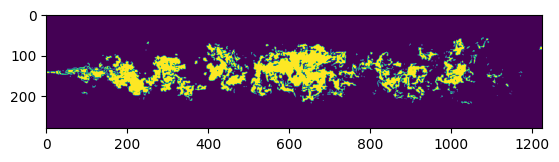

In [4]:
# Plot sample
plt.imshow((data[1,:,:] > 3e-6))

## Reducing size

In [62]:
resized = []
for i in trange(data.shape[0]):
    resized.append(cv2.resize(data[i], dsize=(153,35)))

  0%|          | 0/2600 [00:00<?, ?it/s]

100%|██████████| 2600/2600 [00:24<00:00, 104.35it/s]


In [63]:
resized_data = np.array(resized)

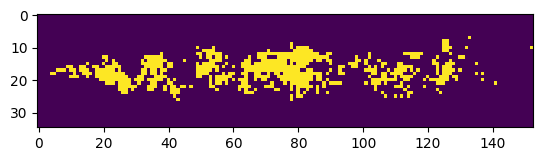

In [21]:
plt.imshow(resized_data[0] > 3e-6)

This gives about 5k states. Let's save this data for the simulation

In [ ]:
# hf = h5py.File('./Data/' + 'nose_data_35_153.mat', 'w')
# hf.create_dataset('nose', data=resized_data)
# hf.close()

## Filtering to threshold and building stats

In [ ]:
threshold = 3e-6
stat_data = np.average(resized_data >= threshold, axis=0)

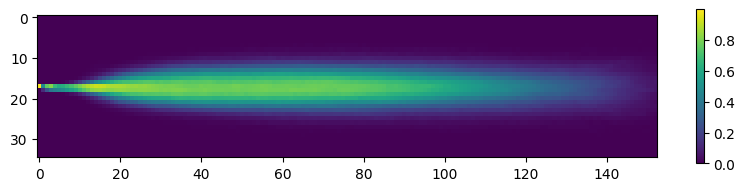

In [74]:
plt.figure(figsize=(10,2))
plt.imshow(stat_data)
plt.colorbar()

## Saving

In [85]:
file_name = './Data/statistics_nose_3e6_35_153.dat'
df = pd.DataFrame(stat_data)
df.to_csv(file_name, index=False, header=False)

# Data exploration

C:\Users\arnau\AppData\Local\Temp\ipykernel_10744\1017660777.py:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(resized_data.ravel()))


(array([3.500000e+01, 1.721000e+03, 5.839100e+04, 2.858160e+05,
        3.744900e+05, 6.553350e+05, 1.293203e+06, 3.048780e+06,
        5.562532e+06, 7.654800e+04]),
 array([-46.78439326, -42.75656912, -38.72874499, -34.70092086,
        -30.67309673, -26.64527259, -22.61744846, -18.58962433,
        -14.5618002 , -10.53397606,  -6.50615193]),
 <BarContainer object of 10 artists>)

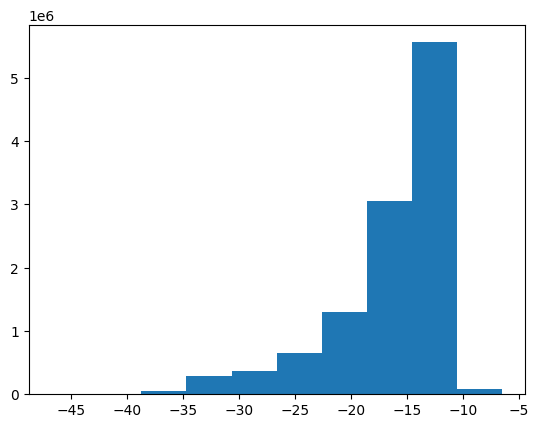

In [64]:
plt.hist(np.log(resized_data.ravel()))

In [44]:
np.exp(-20)

2.061153622438558e-09

In [80]:
thresholds = [0.0, np.exp(-14), np.exp(-12), np.exp(-9), 1.0]
thresholds

[0.0, 8.315287191035679e-07, 6.14421235332821e-06, 0.00012340980408667956, 1.0]

In [75]:
olf_data = []
for i in range(len(thresholds)-1):
    low_t = thresholds[i]
    high_t = thresholds[i+1]
    olf_data.append(np.average((resized_data >= low_t) & (resized_data < high_t), axis=0))

Text(0.5, 1.0, 'High')

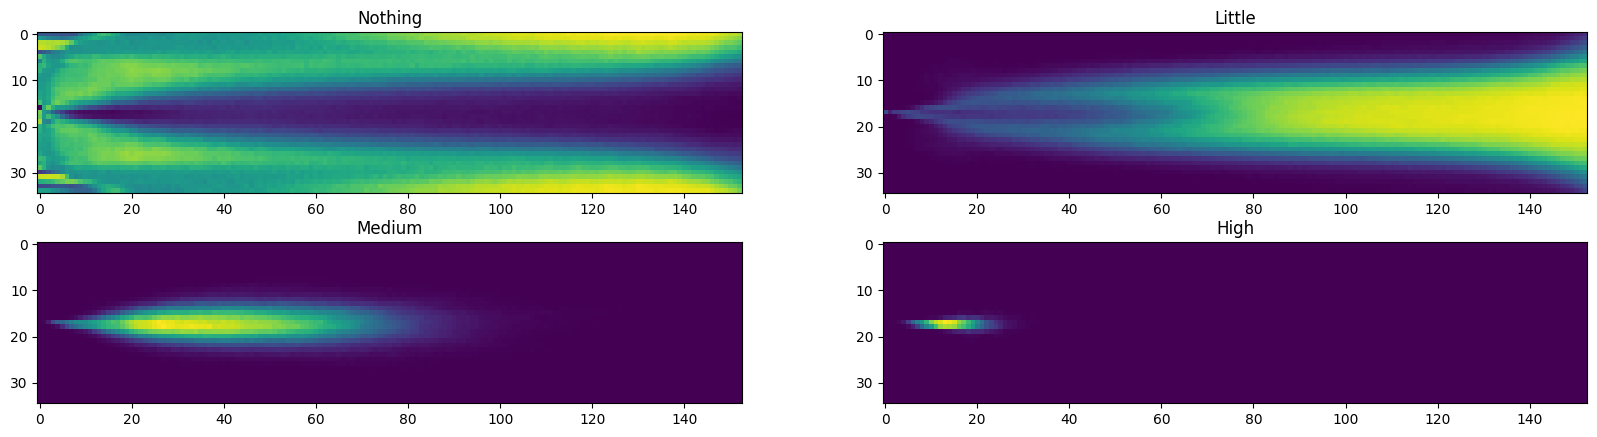

In [79]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(20,5))

ax0.imshow(olf_data[0])
ax0.set_title('Nothing')

ax1.imshow(olf_data[1])
ax1.set_title('Little')

ax2.imshow(olf_data[2])
ax2.set_title('Medium')

ax3.imshow(olf_data[3])
ax3.set_title('High')

In [83]:
olf_data_arr = np.array(olf_data).reshape((4,35*153))

In [87]:
# Saving file
file_name = './Data/statistics_nose_3e6_35_153_4_tresh.dat'
df = pd.DataFrame(olf_data_arr)
df.to_csv(file_name, index=False, header=False)

: 

# Ground data generation

In [3]:
f = h5py.File("C:\\Users\\arnau\\Desktop\\ground_data.mat")
reading_time = time.time()
data = np.asarray(f["ground"])
reading_time = time.time() - reading_time
print("[--] Data read in {}s!".format(round(reading_time, 4)))
f.close()

[--] Data read in 43.542s!


In [4]:
data.shape

(2600, 280, 1225)

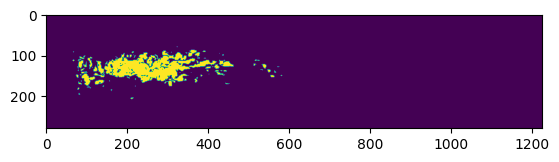

In [6]:
# Plot sample
plt.imshow((data[1,:,:] > 3e-6))

In [7]:
resized = []
for i in trange(data.shape[0]):
    resized.append(cv2.resize(data[i], dsize=(153,35)))

100%|██████████| 2600/2600 [00:14<00:00, 179.19it/s] 


In [9]:
resized_data = np.array(resized)

In [10]:
threshold = 3e-6
stat_data = np.average(resized_data >= threshold, axis=0)

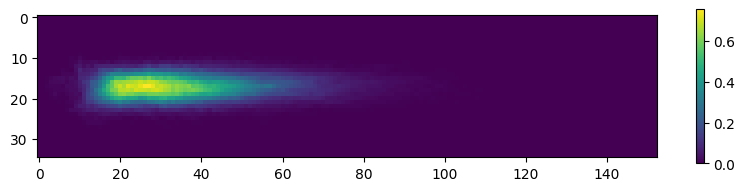

In [11]:
plt.figure(figsize=(10,2))
plt.imshow(stat_data)
plt.colorbar()

In [ ]:
file_name = './Data/statistics_ground_3e6_35_153.dat'
df = pd.DataFrame(stat_data)
df.to_csv(file_name, index=False, header=False)